# 建立一棵树

## 1.导入需要的算法库和模块

In [20]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_wine                      #生成数据集
from sklearn.model_selection import train_test_split        #生成训练集和测试集

## 2.探索数据

In [21]:
wine = load_wine()

In [22]:
# 查看wine数据
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [23]:
# 查看wine的data
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [24]:
# 查看wine.data的维度
wine.data.shape

(178, 13)

In [25]:
# 查看wine的标签
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [26]:
# 将wine的数据变为pd数组类型
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [27]:
# 查看wine数据的特征的名字
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [28]:
# 查看wine数据的标签的名字
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## 3.分训练集和测试集

In [29]:
# 将wine数据分为训练集和测试集-->3成做测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [30]:
# 训练集数据
Xtrain.shape

(124, 13)

In [31]:
# 测试集数据
Xtest.shape

(54, 13)

## 4.建立模型

In [32]:
# 使用决策树训练
# criterion-->使用信息熵，默认为基尼系数
# splitter-->best-->优先选择更重要的特征进行剪枝random-->分枝是更加随机
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30,splitter="random")
# 传入训练数据
clf = clf.fit(Xtrain, Ytrain)
# 返回预测的准确度
score = clf.score(Xtest, Ytest)
score

0.9814814814814815

## 5.画出一棵树

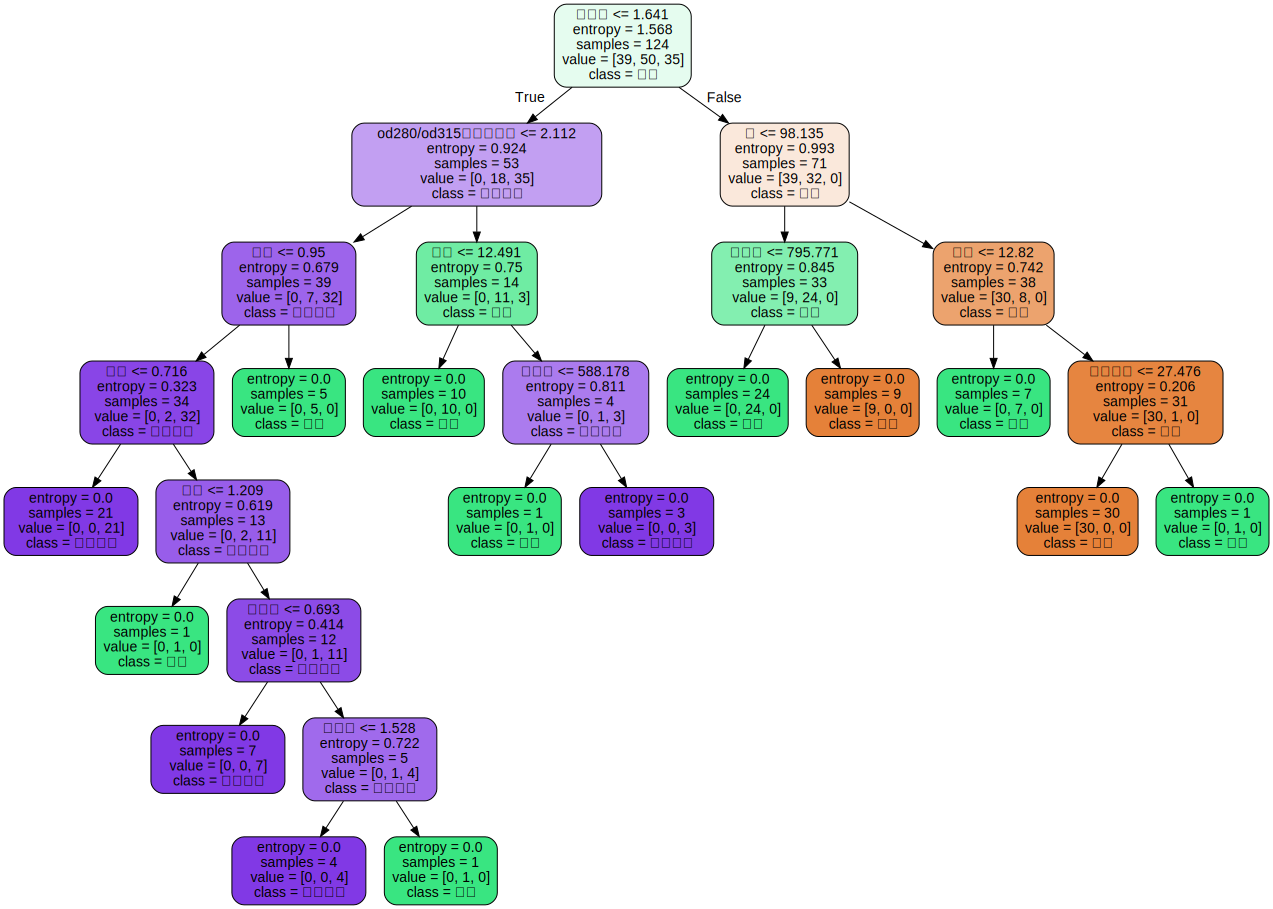

In [33]:
# 特征名字列表
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

# 导入画图库
import graphviz

# 传入所需数据
dot_data = tree.export_graphviz(clf
                                ,out_file = None
                                ,feature_names = feature_name
                                ,class_names = ["琴酒","雪梨","贝尔摩德"]
                                ,filled = True           # 填充块的颜色
                                ,rounded = True
)

# 画图
graph = graphviz.Source(dot_data)

# 显示图形
graph

## 6.探索决策树

In [34]:
# 特征重要性
clf.feature_importances_

array([0.14958652, 0.        , 0.        , 0.03277269, 0.07399654,
       0.01586947, 0.41106267, 0.        , 0.        , 0.        ,
       0.09475523, 0.06182225, 0.16013464])

In [35]:
# 特征名字与特征重要性
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.14958652061803385),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.03277268548464016),
 ('镁', 0.07399653818256281),
 ('总酚', 0.015869468435216926),
 ('类黄酮', 0.4110626720457213),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.0),
 ('色调', 0.0947552303325241),
 ('od280/od315稀释葡萄酒', 0.06182224919512044),
 ('脯氨酸', 0.1601346357061804)]

# 剪枝优化

## 1.剪枝参数

In [36]:
# 查看对训练集的拟合程度
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

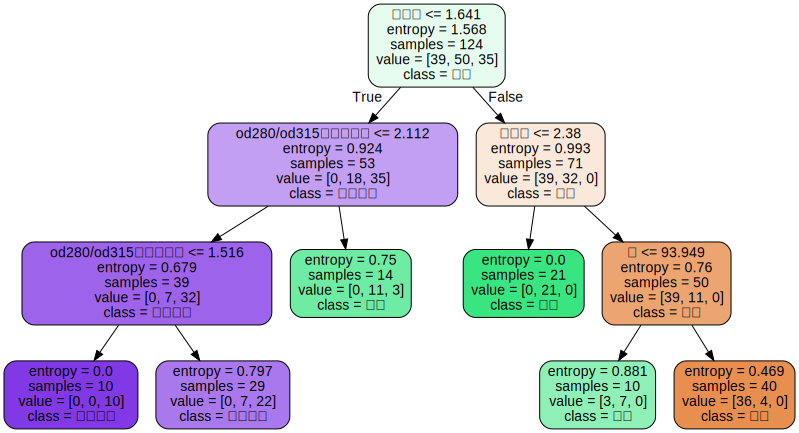

In [49]:
# max_depth-->限制树的最大深度，超过设定深度的树枝全部剪掉
# min_samples_leaf-->每个结点的子结点至少含有min_samples_leaf个结点时，这个结点才能继续分枝
# min_samples_split-->每个结点至少含有min_samples_split个结点才能继续分枝

# 使用决策树模型
clf = tree.DecisionTreeClassifier(criterion = "entropy"
                                  ,random_state = 30
                                  ,splitter = "random"
                                  ,max_depth = 3
#                                   ,min_samples_leaf = 10
#                                   ,min_samples_split = 25
)

# 传入数据
clf = clf.fit(Xtrain, Ytrain)\


# 传入画图所需数据
dot_data = tree.export_graphviz(clf
                                ,feature_names = feature_name
                                ,class_names = ["琴酒","雪梨","贝尔摩德"]
                                ,filled = True
                                ,rounded = True
)

# 画图
graph = graphviz.Source(dot_data)

# 显示图形
graph

In [50]:
# 显示拟合度
score = clf.score(Xtest, Ytest)
score

0.8518518518518519

## 2.确认最优的剪枝参数

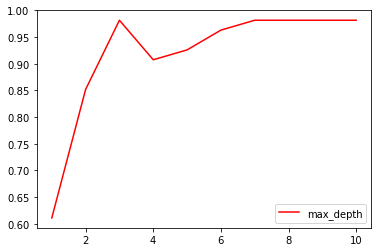

In [53]:
import matplotlib.pyplot as plt

# 用于保存每个最大层数剪枝对应的拟合度
test = []

for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth = i+1
                                     ,criterion = "entropy"
                                     ,random_state = 30
                                     ,splitter = "random"
    )
    
    clf = clf.fit(Xtrain, Ytrain)
    
    score = clf.score(Xtest, Ytest)
    test.append(score)
    
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()


# 重要属性和接口

In [54]:
# apply返回每个测试样本所在的叶子结点的索引
clf.apply(Xtest)

array([25, 20, 21, 21, 20, 25, 20, 12, 23, 25, 25, 20, 10,  4, 20, 21, 23,
       20, 20, 20, 23,  4, 25, 25, 25, 14,  4, 25,  4, 16, 10,  4, 20, 20,
       20, 20, 23, 25, 20, 25, 25,  4,  4, 21, 25, 21, 21, 21,  8, 14, 20,
       25,  4,  8], dtype=int64)

In [55]:
# predict返回模型预测的数据的标签（与原数据集里的标签不一定相同）
clf.predict(Xtest)

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 1, 1, 0, 2, 2])

# 交叉验证

In [57]:
from sklearn.datasets import load_boston   # 波士顿房价数据
from sklearn.model_selection import cross_val_score   # 导入交叉验证模块
from sklearn.tree import DecisionTreeRegressor

In [63]:
boston = load_boston()    # 导入boston数据
boston          # 字典

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [62]:
# boston数据
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [61]:
# boston标签
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [65]:
regressor = DecisionTreeRegressor(random_state = 0)   # 实例化
# 交叉验证
# cv-->将数据分为几份
# scoring-->默认为R平方
# neg_mean_squared_error-->均方误差，默认为负值
cross_val_score(regressor, boston.data, boston.target, cv= 10, scoring="neg_mean_squared_error")

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

# 一维回归拟合正弦曲线

## 1.导入需要的库

In [83]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

## 2.创建一条含有噪声的正弦曲线

In [84]:
# 固定随机数生成模式
rng = np.random.RandomState(1)

# 生成80个0~`5的随机数字作为横坐标，需要排序
x = np.sort(5*rng.rand(80,1),axis=0)

# 生成正弦曲线，y值需要作为一维，由于x值为二维，需要降维
y = np.sin(x).ravel()

# 创建噪声
y[::5] = y[::5] + 3*(0.5 - rng.rand(16))


In [92]:
# ravel-->降维为一维
np.random.random((3,1)).ravel()

array([0.83893214, 0.3874273 , 0.73618635])

## 3.实例化训练模型

In [85]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x,y)
regr_2.fit(x,y)

DecisionTreeRegressor(max_depth=5)

## 4.测试集导入模型，预测结果

In [86]:
# 生成测试集数据
# 生成0~5的数据，由于sklearn要求输入数据为二维，要升维
X_test = np.arange(0,5,0.01)[:,np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [103]:
l = np.arange(4)
# l

array([[0, 1, 2, 3]])

In [104]:

l[:,np.newaxis]

array([[0],
       [1],
       [2],
       [3]])

In [105]:
l[np.newaxis,:]

array([[0, 1, 2, 3]])

## 5.绘制图像

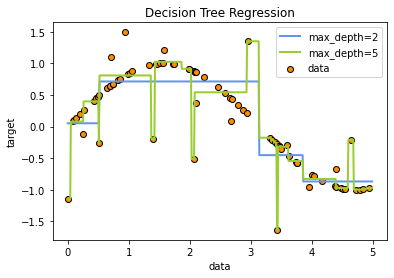

In [87]:
plt.figure()
plt.scatter(x,y,edgecolor="black",c= "darkorange",label="data")
plt.plot(X_test,y_1,color="cornflowerblue",label="max_depth=2",linewidth=2)
plt.plot(X_test,y_2,color="yellowgreen",label="max_depth=5",linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()